# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"?

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

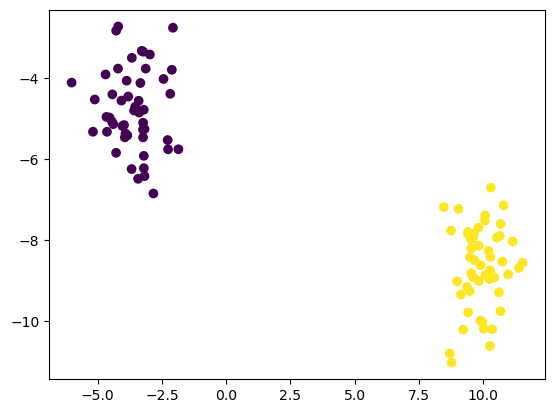

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

(X_easy, y_easy) = make_blobs(centers = 2)

def visualize(X, y):
    plt.scatter(X[:,0], X[:,1], c = y)
    plt.show()

visualize(X_easy, y_easy)


### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# the Bayes Generative model assuming equal covariance matrices for all classes
def equal_cov(X_tr, X_ts, y_tr, y_ts, display = False):
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_tr, y_tr)
    y_pred_ts = clf.predict(X_ts)
    if display:
        print("Bayesian with equal covariance")
        print(classification_report(y_ts, y_pred_ts))
    return clf
    
# the Bayes Generative model assuming independent covariance matrices for all classes.
def indep_cov(X_tr, X_ts, y_tr, y_ts, display = False):
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_tr, y_tr)
    y_pred_ts = clf.predict(X_ts)
    if display:
        print("Bayesian with independent covariance")
        print(classification_report(y_ts, y_pred_ts))
    return clf
    
# the Linear SVM
def lin_svm(X_tr, X_ts, y_tr, y_ts, display = False):
    clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_tr, y_tr)
    y_pred_ts = clf.predict(X_ts)
    if display:
        print("Linear SVM")
        print(classification_report(y_ts, y_pred_ts))
    return clf
                                
X_train, X_test, y_train, y_test = train_test_split(
    X_easy, y_easy, test_size=0.25)


equal_cov(X_train, X_test, y_train, y_test, display = True)
indep_cov(X_train, X_test, y_train, y_test, display = True)
lin_svm(X_train, X_test, y_train, y_test, display = True)
      

Bayesian with equal covariance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Bayesian with independent covariance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Linear SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00      

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

Bayesian with equal covariance


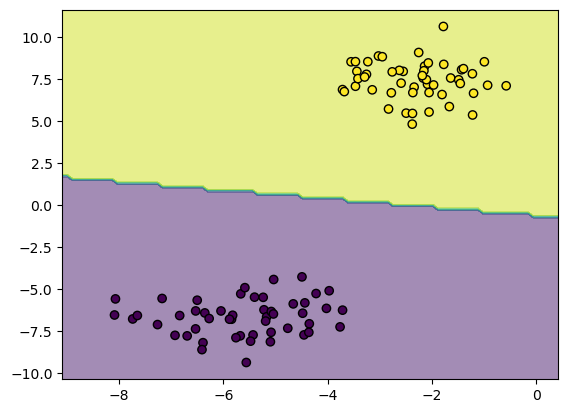

Bayesian with independent covariance


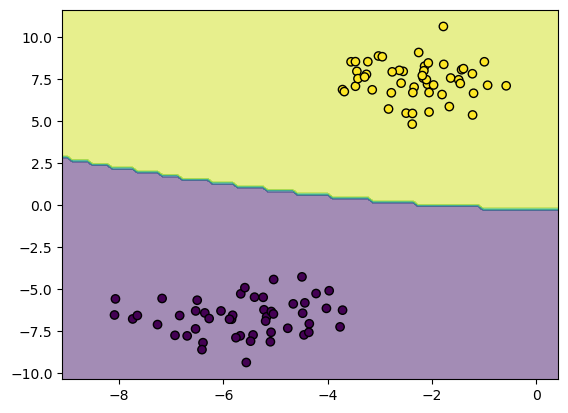

Linear SVM


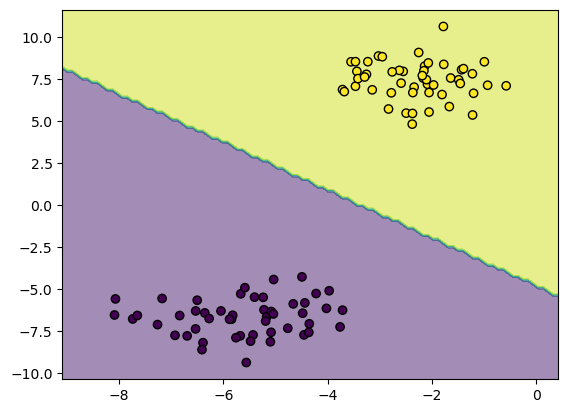

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay

def decision_surface(X, y):
    print("Bayesian with equal covariance")
    clf_equal_cov = LinearDiscriminantAnalysis()
    equal_cov_classifier = clf_equal_cov.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(equal_cov_classifier, X, response_method="predict", alpha=0.5)
    disp.ax_.scatter(X[:,0], X[:,1], c = y, edgecolor="k")
    plt.show()
    
    print("Bayesian with independent covariance")
    clf_indep_cov = QuadraticDiscriminantAnalysis()
    indep_cov_classifier = clf_indep_cov.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(indep_cov_classifier, X, response_method="predict", alpha=0.5)
    disp.ax_.scatter(X[:,0], X[:,1], c = y, edgecolor="k")
    plt.show()
    
    print("Linear SVM")
    clf_lin_svm = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
    lin_svm_classifier = clf_lin_svm.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(lin_svm_classifier, X, response_method="predict", alpha=0.5)
    disp.ax_.scatter(X[:,0], X[:,1], c = y, edgecolor="k")
    plt.show()
    
decision_surface(X_easy, y_easy)

### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data. How can we make these classifiers capable of "solving" this harder dataset?

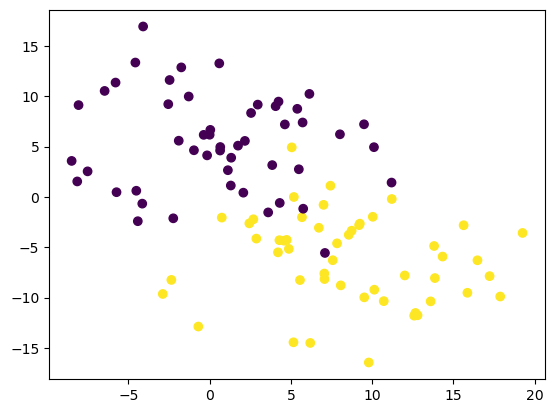

Bayesian with equal covariance


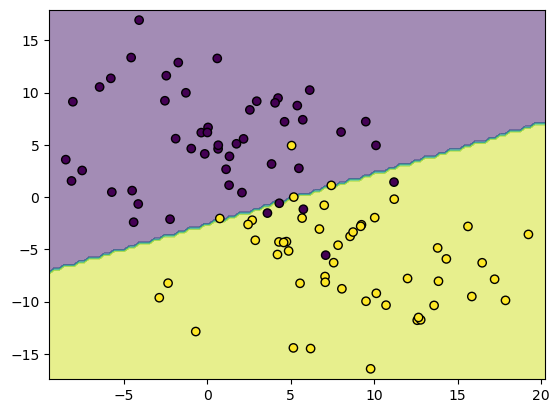

Bayesian with independent covariance


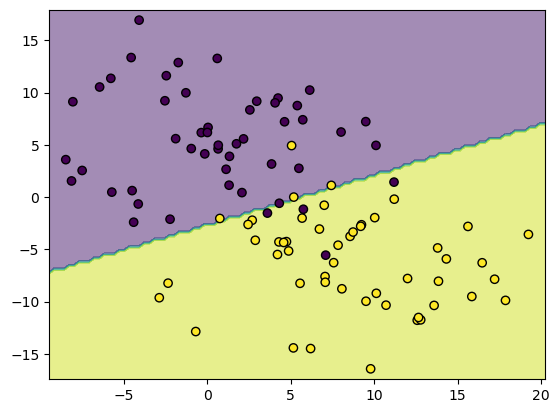

Linear SVM


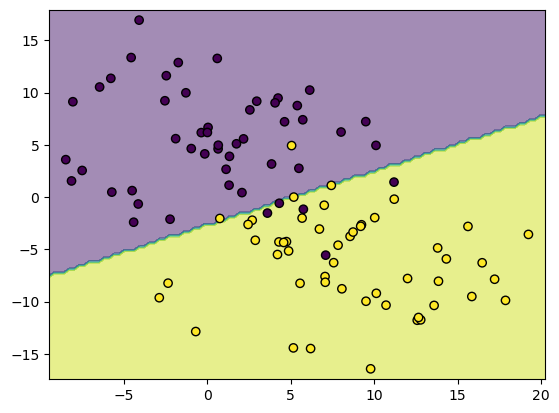

In [6]:
# changing the standard deviation of the clusters
(X_hard, y_hard) = make_blobs(centers = 2, cluster_std = 5.0)
visualize(X_hard, y_hard)

decision_surface(X_hard, y_hard)

---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris classification dataset to get started.
ds = load_iris()

# Extract the features (Xs), targets (ys), and class names (labels).
Xs = ds.data
ys = ds.target
classes = ds.target_names

# Make a Pandas DataFrame too, just for shits and giggles.
df = pd.DataFrame(Xs, columns=ds.feature_names)
targets = pd.Series(ds.target)

### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? **Be creative** and **summarize** your findings with analysis along the way.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


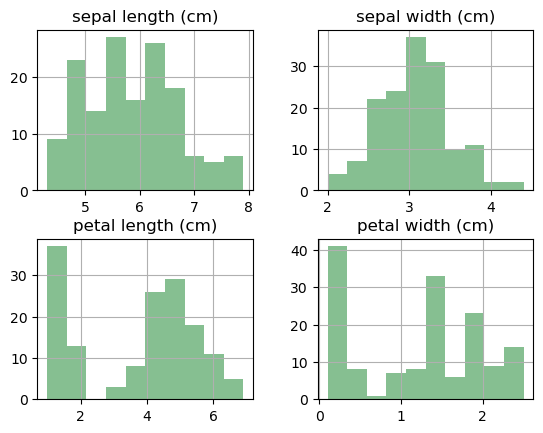

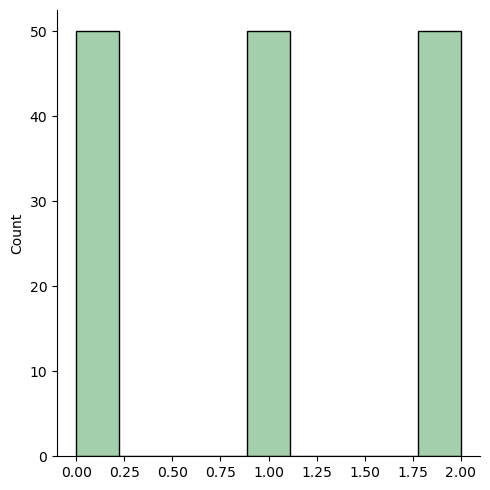

In [8]:
import seaborn as sns

print(ds.keys())

# meaning that we have 150 samples of 4 attributes
display(df)

# values of those 4 attributes
display(df.describe())
df.hist(color='#86bf91')

# 50 values for each class
sns.displot(data = targets, color='#86bf91')

### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

In [9]:
from sklearn.model_selection import cross_val_score

skrinkage_range = [0, 0.01, 0.05, 0.1, 0.5, 1]
reg_param_range = [0, 0.01, 0.05, 0.1, 0.5, 1]
C_range = [0.001, 0.1, 1.0, 10, 20, 50, 100, 1000]

def chooseClassifier(X_tr, X_ts, y_tr, y_ts):
    print("Bayesian with equal covariance")
    clf_equal_cov = LinearDiscriminantAnalysis(solver='lsqr')
    clf_equal_cov.fit(X_tr, y_tr)
    score_equal_cov = cross_val_score(clf_equal_cov, X_tr, y_tr, cv=3, verbose=3, n_jobs=4)
    print("Without regularization", score_equal_cov)
    for k in skrinkage_range:
        clf_equal_cov = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=k)
        clf_equal_cov.fit(X_tr, y_tr)
        score_equal_cov = cross_val_score(clf_equal_cov, X_tr, y_tr, cv=3, verbose=3, n_jobs=4)
        print(score_equal_cov)
    
    print()
    
    print("Bayesian with independent covariance")
    clf_indep_cov = QuadraticDiscriminantAnalysis()
    clf_indep_cov.fit(X_tr, y_tr)
    score_indep_cov = cross_val_score(clf_indep_cov, X_tr, y_tr, cv=3, verbose=3, n_jobs=4)
    print("Without regularization", score_indep_cov)
    for i in reg_param_range:
        print("Regularization parameter set to", i)
        clf_indep_cov = QuadraticDiscriminantAnalysis(reg_param=i)
        clf_indep_cov.fit(X_tr, y_tr)
        score_indep_cov = cross_val_score(clf_indep_cov, X_tr, y_tr, cv=3, verbose=3, n_jobs=4)
        print(score_indep_cov)
    
    print()
    
    print("Linear SVM")
    clf_lin_svm = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000, random_state=0, tol=1e-5))
    clf_lin_svm.fit(X_tr, y_tr)
    score_lin_svm = cross_val_score(clf_lin_svm, X_tr, y_tr, cv=3, verbose=3, n_jobs=4)
    print("Without regularization", score_lin_svm)
    for j in C_range:
        print("Regularization parameter set to", 1/j)
        clf_lin_svm = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000, C=j, random_state=0, tol=1e-5))
        clf_lin_svm.fit(X_tr, y_tr)
        score_lin_svm = cross_val_score(clf_lin_svm, X_tr, y_tr, cv=3, verbose=3, n_jobs=4)
        print(score_lin_svm)

X_train, X_test, y_train, y_test = train_test_split(
    df, targets, test_size=0.25)
chooseClassifier(X_train, X_test, y_train, y_test)

Bayesian with equal covariance


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Without regularization [0.97368421 0.91891892 1.        ]


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concu

[0.97368421 0.91891892 1.        ]
[0.97368421 0.94594595 1.        ]
[0.97368421 0.94594595 1.        ]
[0.97368421 0.94594595 1.        ]
[0.94736842 0.94594595 1.        ]
[0.92105263 0.86486486 0.97297297]

Bayesian with independent covariance
Without regularization [0.97368421 0.97297297 1.        ]
Regularization parameter set to 0


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concu

[0.97368421 0.97297297 1.        ]
Regularization parameter set to 0.01
[0.97368421 0.97297297 1.        ]
Regularization parameter set to 0.05
[0.97368421 0.94594595 1.        ]
Regularization parameter set to 0.1
[0.94736842 0.91891892 1.        ]
Regularization parameter set to 0.5
[0.92105263 0.89189189 1.        ]
Regularization parameter set to 1
[0.89473684 0.89189189 0.94594595]

Linear SVM
Without regularization [0.94736842 0.83783784 1.        ]
Regularization parameter set to 1000.0


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished


[0.73684211 0.75675676 0.81081081]
Regularization parameter set to 10.0
[0.92105263 0.78378378 0.94594595]
Regularization parameter set to 1.0
[0.94736842 0.83783784 1.        ]
Regularization parameter set to 0.1
[0.97368421 0.83783784 1.        ]
Regularization parameter set to 0.05


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\mo4al\anaconda3\envs\FML\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0.97368421 0.83783784 1.        ]
Regularization parameter set to 0.02


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\mo4al\anaconda3\envs\FML\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished


[0.97368421 0.89189189 1.        ]
Regularization parameter set to 0.01
[0.97368421 0.89189189 1.        ]
Regularization parameter set to 0.001
[0.94736842 0.89189189 0.97297297]


C:\Users\mo4al\anaconda3\envs\FML\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished


**Analysis:**
All of these classifiers have a very good performance since the dataset is quite easy. That is also the reason as to why we cannot really see any difference with regularization. In fact, in this exercise sometimes even if no regularization has been done we get the same result (sometimes even better with SVM!).

---
## Part 3: A Harder Dataset

OK, now let's switch to a the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

ds_digits = load_digits()
df_digits = pd.DataFrame(ds_digits.data)     # Why are there no column names? - columns are different pixels
targets_digits = pd.Series(ds_digits.target)

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

(1797, 64)


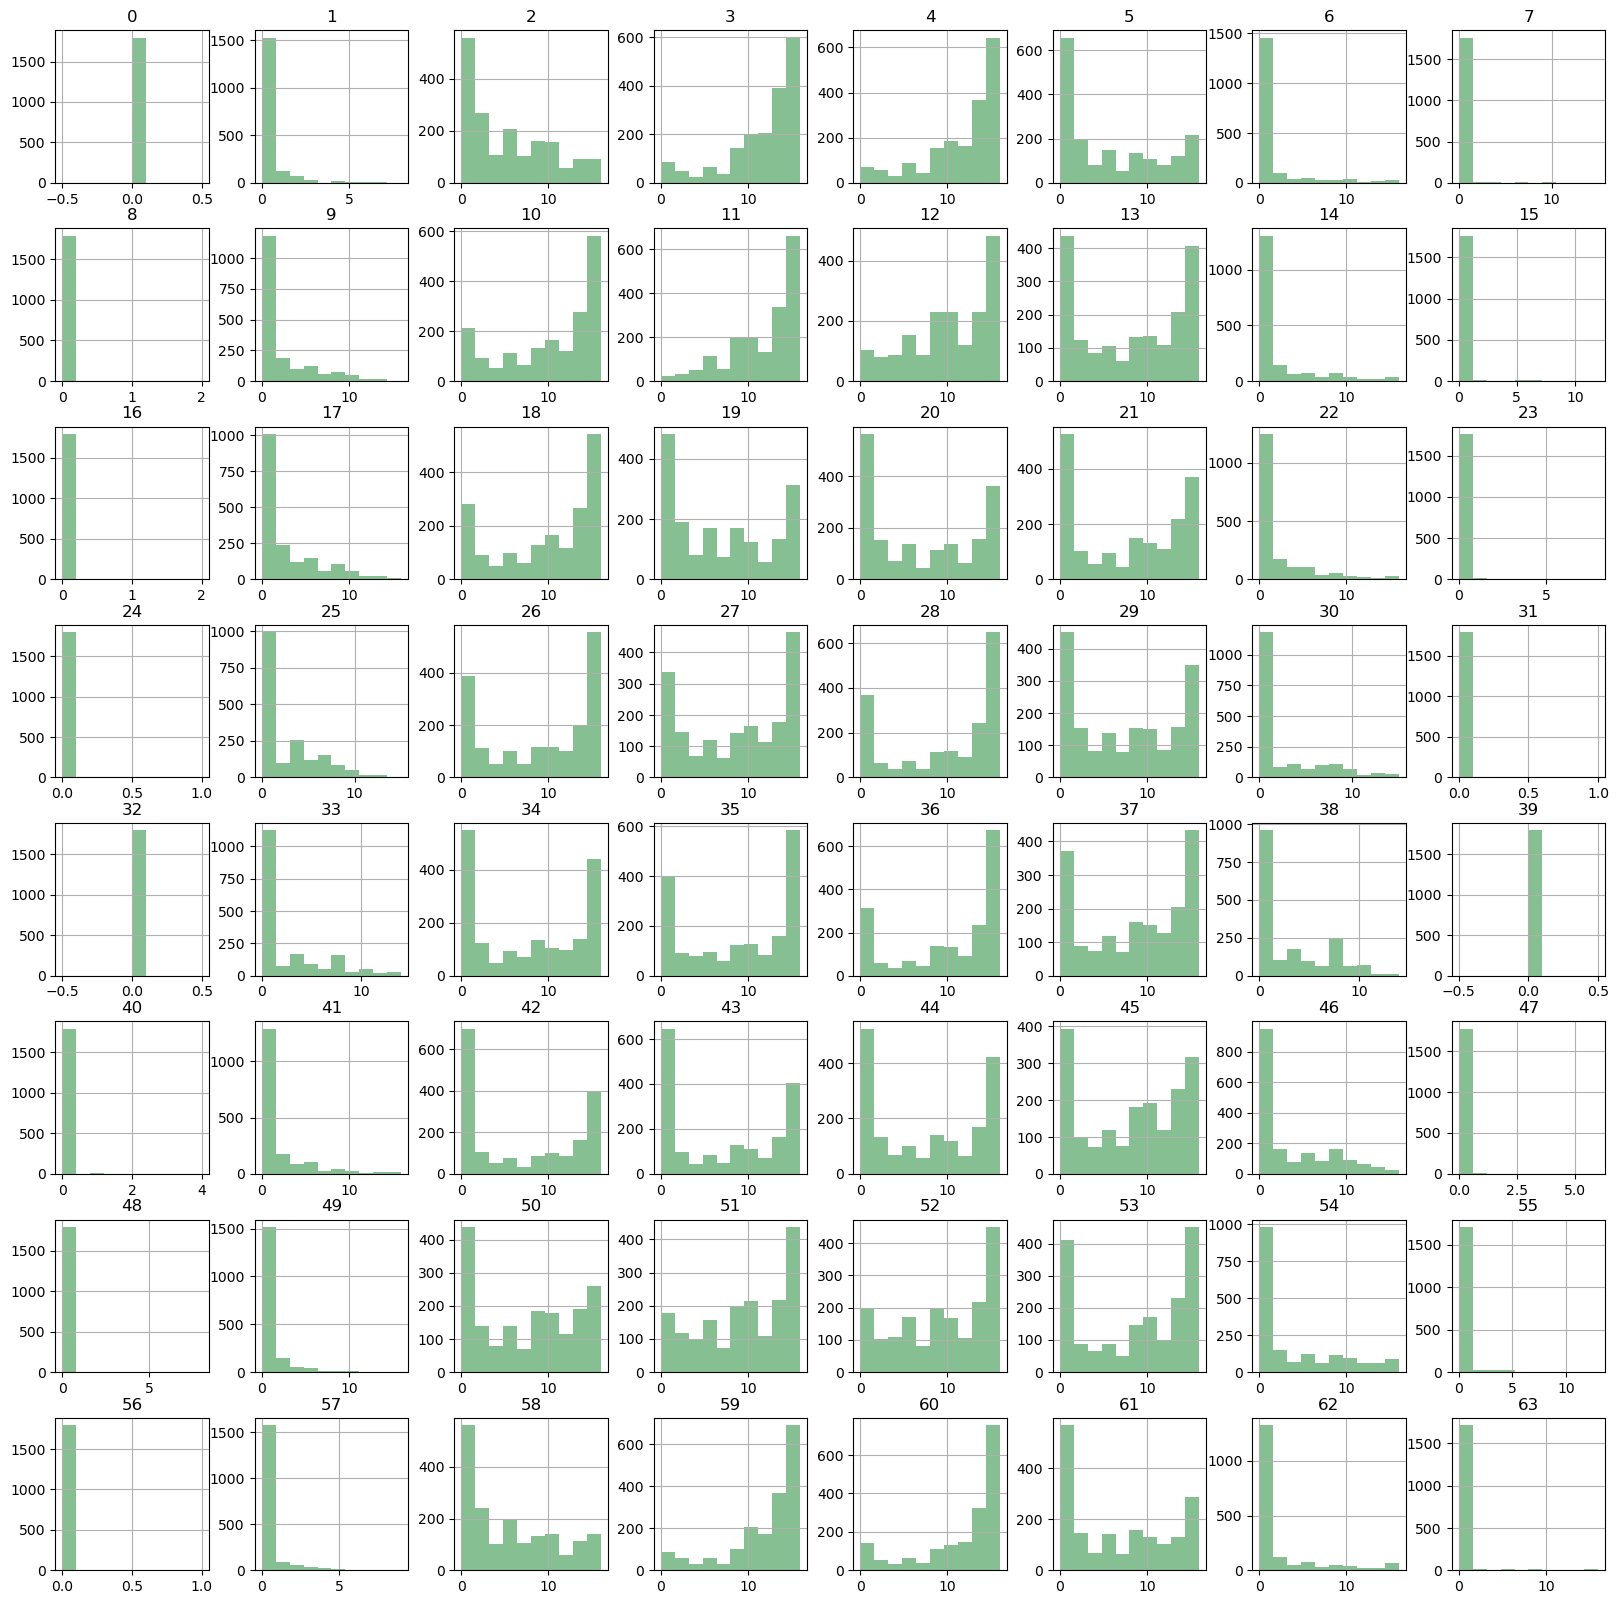

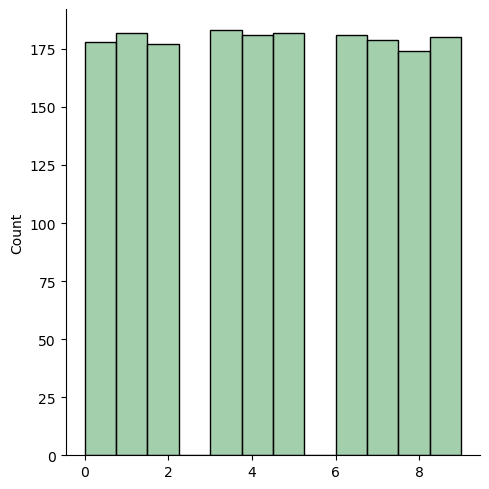

In [11]:
print(df_digits.shape)

# values of the attributes
df_digits.hist(color='#86bf91', figsize = (20, 20))

# 50 values for each class
sns.displot(data = targets_digits, color='#86bf91')

### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

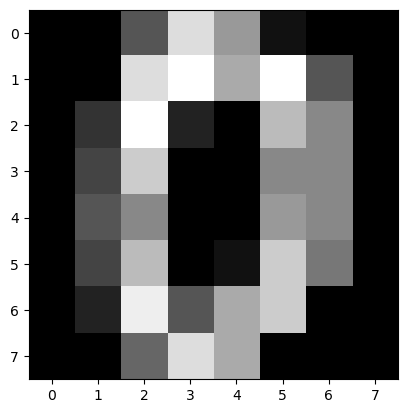

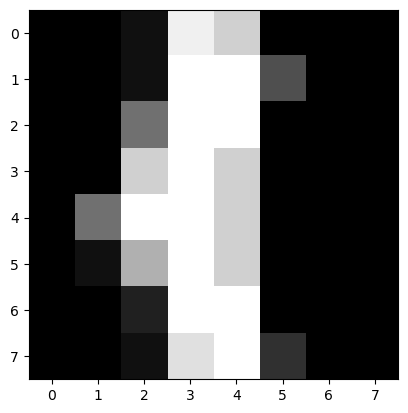

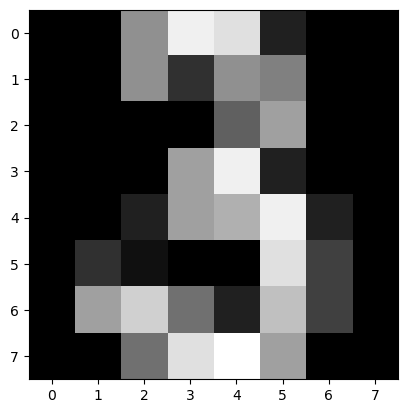

In [12]:
def visualizeAnImage(i):
    plt.imshow(df_digits.iloc[i,:].to_numpy().reshape(8,8), cmap='gray')
    plt.show()

visualizeAnImage(0) # 1st row
visualizeAnImage(99) # 100th row
visualizeAnImage(999) # 1000th row

### Exercise 3.3: Find the best classifier (of the three we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_digits, targets_digits, test_size=0.25)

shrinkage_grid = {'shrinkage': [0, 0.01, 0.05, 0.1, 0.5, 1]}
reg_param_grid = {'reg_param': [0, 0.01, 0.05, 0.1, 0.5, 1]}
C_grid = {'C': [0.001, 0.1, 1.0, 10, 20, 50, 100, 1000]}

def getSearch(model, param_grid, X_tr, X_ts, y_tr, y_ts):
    search = GridSearchCV(model, param_grid, cv=3, verbose=3, n_jobs=4)
    search.fit(X_tr, y_tr)
    test_score = accuracy_score(y_ts, search.best_estimator_.predict(X_ts))
    print(f'Best parameters: {search.best_params_}')
    print(f'Best cross-val score: {search.best_score_}')
    print(f'Score on test set: {test_score}')

print("Bayesian with equal covariance")
clf_equal_cov = LinearDiscriminantAnalysis(solver = "lsqr")
clf_equal_cov.fit(X_train, y_train)
score_equal_cov = cross_val_score(clf_equal_cov, X_train, y_train, cv=3, verbose=3, n_jobs=4)
print("without regulatization", score_equal_cov)
getSearch(clf_equal_cov, shrinkage_grid, X_train, X_test, y_train, y_test)

print()

print("Bayesian with independent covariance")
clf_indep_cov = QuadraticDiscriminantAnalysis()
clf_indep_cov.fit(X_train, y_train)
score_indep_cov = cross_val_score(clf_indep_cov, X_train, y_train, cv=3, verbose=3, n_jobs=4)
print("without regulatization", score_indep_cov)
getSearch(clf_indep_cov, reg_param_grid, X_train, X_test, y_train, y_test)

print()

print("Linear SVM")
clf_lin_svm = LinearSVC(max_iter=10000, random_state=0, tol=1e-5)
clf_lin_svm.fit(X_train, y_train)
score_lin_svm = cross_val_score(clf_lin_svm, X_train, y_train, cv=3, verbose=3, n_jobs=4)
print("without regulatization", score_lin_svm)
getSearch(clf_lin_svm, C_grid, X_train, X_test, y_train, y_test)


Bayesian with equal covariance
without regulatization [0.95768374 0.95100223 0.93986637]
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished


Best parameters: {'shrinkage': 0.05}
Best cross-val score: 0.9524870081662956
Score on test set: 0.9422222222222222

Bayesian with independent covariance
without regulatization [0.79064588 0.83518931 0.81291759]
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\mo4al\anaconda3\envs\FML\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\mo4al\anaconda3\envs\FML\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Best parameters: {'reg_param': 0.5}
Best cross-val score: 0.985894580549369
Score on test set: 0.9844444444444445

Linear SVM


C:\Users\mo4al\anaconda3\envs\FML\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished


without regulatization [0.93986637 0.93986637 0.93541203]
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'C': 0.001}
Best cross-val score: 0.96362286562732
Score on test set: 0.9555555555555556


**Analysis**
The best classifier in this case is the Bayesian with independent covariance matrix with the regularization parameter set to 0.5. We have to note that without regularization it is the worst classifier of the three.